In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
payments = pd.read_csv('./olist_order_payments_dataset.csv')

In [4]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [6]:
payments_uniqueOrder_id=payments.order_id.nunique()

In [7]:
print(payments_uniqueOrder_id)

99440


In [8]:
ordersInfo = pd.read_csv('./olist_orders_dataset.csv')

In [9]:
ordersInfo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
ordersInfo_uniqueOrder_id=ordersInfo.order_id.nunique()
print(ordersInfo_uniqueOrder_id)

99441


In [11]:
ordersInfo_OrderStatus_id=ordersInfo.order_status.unique()
print(ordersInfo_OrderStatus_id)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [12]:
ordersInfo_uniqueCustomer_id=ordersInfo.customer_id.nunique()
print(ordersInfo_uniqueCustomer_id)

99441


In [13]:
productInfo = pd.read_csv('./olist_products_dataset.csv')
productInfo.head()
productName = pd.read_csv('./product_category_name_translation.csv')
productName.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
orderReview=pd.read_csv('./olist_order_reviews_dataset.csv')
orderReview.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
orderDetailsMain=pd.read_csv('./olist_order_items_dataset.csv')

orderDetailsMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
orderDetailsMain.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
orderid=orderDetailsMain.order_id.nunique()
print(orderid)
prodid=orderDetailsMain.product_id.nunique()
print(prodid)

98666
32951


In [18]:
modelDataframe=orderDetailsMain[['order_id','product_id','price','freight_value']]

In [19]:
modelDataframe.head()
modelDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   product_id     112650 non-null  object 
 2   price          112650 non-null  float64
 3   freight_value  112650 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.4+ MB


In [20]:
orderid=modelDataframe.order_id.nunique()
print(orderid)

98666


In [21]:
productDescription=pd.merge(productInfo,productName,how='inner',on='product_category_name')

In [22]:
productDescription.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [23]:
df1=pd.merge(modelDataframe,orderReview,how='inner',on='order_id')

In [24]:
df1.head()

,order_id,product_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [25]:
orderid=df1.order_id.nunique()
print(orderid)
prodid=df1.product_id.nunique()
print(prodid)

98666
32951


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113322 entries, 0 to 113321
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 113322 non-null  object 
 1   product_id               113322 non-null  object 
 2   price                    113322 non-null  float64
 3   freight_value            113322 non-null  float64
 4   review_id                113322 non-null  object 
 5   review_score             113322 non-null  int64  
 6   review_comment_title     13622 non-null   object 
 7   review_comment_message   48592 non-null   object 
 8   review_creation_date     113322 non-null  object 
 9   review_answer_timestamp  113322 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 9.5+ MB


In [27]:
df2=pd.merge(df1,productDescription,how='inner',on='product_id')

In [28]:
df2.head()

,order_id,product_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111686 entries, 0 to 111685
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111686 non-null  object 
 1   product_id                     111686 non-null  object 
 2   price                          111686 non-null  float64
 3   freight_value                  111686 non-null  float64
 4   review_id                      111686 non-null  object 
 5   review_score                   111686 non-null  int64  
 6   review_comment_title           13533 non-null   object 
 7   review_comment_message         47859 non-null   object 
 8   review_creation_date           111686 non-null  object 
 9   review_answer_timestamp        111686 non-null  object 
 10  product_category_name          111686 non-null  object 
 11  product_name_lenght            111686 non-null  float64
 12  product_description_lenght    

In [30]:
df3=df2[['order_id','product_id','review_score','price','freight_value','review_comment_title','review_comment_message','product_category_name_english']]

In [31]:
df3.head()

,order_id,product_id,review_score,price,freight_value,review_comment_title,review_comment_message,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,5,58.9,13.29,NaN,"Perfeito, produto entregue antes do combinado.",cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,5,55.9,17.96,NaN,"lannister como sempre, entregou certinho e den...",cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,4,64.9,18.33,super recomendo,carrinho muito bonito,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,5,58.9,16.17,NaN,NaN,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,5,58.9,13.29,NaN,NaN,cool_stuff


In [32]:
df4=pd.merge(df2,ordersInfo,how='inner',on='order_id')

In [33]:
df4.head()

,order_id,product_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,...,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,...,9.0,14.0,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,...,9.0,14.0,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,...,9.0,14.0,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,...,9.0,14.0,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00


In [34]:
#df5=df4[['order_id','product_id','order_status','review_score','price','freight_value','review_comment_title','review_comment_message','product_category_name_english']]

In [35]:
#df5.head()

In [36]:
#finalDataFrame=df5.loc[df5['order_status']=='delivered']

In [37]:
#finalDataFrame.head()

In [38]:
#finalDataFrame.to_csv('deliveredProduct.csv') 

In [39]:
df5=pd.merge(df4,payments,how='inner',on='order_id')
df5.head()

,order_id,product_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,...,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1,boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,...,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,...,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,...,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,1,credit_card,4,72.19


In [40]:
df5['order_status'].value_counts()

delivered      114067
shipped          1225
canceled          553
invoiced          364
processing        362
unavailable         7
approved            3
Name: order_status, dtype: int64

In [41]:
df5=df5.drop(['order_id','product_id','order_id','review_id','payment_sequential','review_creation_date','review_answer_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], axis=1)

In [42]:
df5.head()

,price,freight_value,review_score,review_comment_title,review_comment_message,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_type,payment_installments,payment_value
0,58.9,13.29,5,NaN,"Perfeito, produto entregue antes do combinado.",cool_stuff,58.0,598.0,4.0,650.0,...,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29 00:00:00,credit_card,2,72.19
1,55.9,17.96,5,NaN,"lannister como sempre, entregou certinho e den...",cool_stuff,58.0,598.0,4.0,650.0,...,9.0,14.0,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-07-26 00:00:00,boleto,1,73.86
2,64.9,18.33,4,super recomendo,carrinho muito bonito,cool_stuff,58.0,598.0,4.0,650.0,...,9.0,14.0,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-06-07 00:00:00,credit_card,2,83.23
3,58.9,16.17,5,NaN,NaN,cool_stuff,58.0,598.0,4.0,650.0,...,9.0,14.0,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-25 00:00:00,credit_card,3,75.07
4,58.9,13.29,5,NaN,NaN,cool_stuff,58.0,598.0,4.0,650.0,...,9.0,14.0,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-09-01 00:00:00,credit_card,4,72.19


In [43]:
df5=df5.drop(['review_comment_title','review_comment_message','product_category_name','customer_id','payment_type'], axis=1)

In [44]:
df5.head()

,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_installments,payment_value
0,58.9,13.29,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-29 00:00:00,2,72.19
1,55.9,17.96,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-06-28 11:52:20,2017-07-26 00:00:00,1,73.86
2,64.9,18.33,4,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2018-05-18 10:25:53,2018-06-07 00:00:00,2,83.23
3,58.9,16.17,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-25 00:00:00,3,75.07
4,58.9,13.29,5,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-08-10 21:48:40,2017-09-01 00:00:00,4,72.19


In [45]:
df5=df5.drop(['product_name_lenght','product_description_lenght'], axis=1)

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  
df5['encodedCategory']= label_encoder.fit_transform(df5['product_category_name_english'])

In [47]:
#df5=df5.drop(['product_category_name_english'], axis=1)

In [48]:
df5['category_count'] = df5.groupby('encodedCategory')['encodedCategory'].transform('count')

In [49]:
df5['TargetVar']=df5.order_status.apply(lambda x: 1 if x in ['delivered','invoiced','shipped'] else 0)
 

In [50]:
import datetime as dt

In [51]:
df5['order_estimated_delivery_date']= pd.to_datetime(df5['order_estimated_delivery_date'])
df5['order_purchase_timestamp']= pd.to_datetime(df5['order_purchase_timestamp'])

In [52]:
df5['Days_to_deliver'] = df5['order_estimated_delivery_date'] - df5['order_purchase_timestamp']

In [53]:
df5['Days_to_deliver']=df5['Days_to_deliver']/np.timedelta64(1,'D')


In [54]:
df5.head()

,price,freight_value,review_score,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_installments,payment_value,encodedCategory,category_count,TargetVar,Days_to_deliver
0,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-29,2,72.19,20,3999,1,15.625671
1,55.9,17.96,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-06-28 11:52:20,2017-07-26,1,73.86,20,3999,1,27.505324
2,64.9,18.33,4,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2018-05-18 10:25:53,2018-06-07,2,83.23,20,3999,1,19.565359
3,58.9,16.17,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-08-01 18:38:42,2017-08-25,3,75.07,20,3999,1,23.223125
4,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,delivered,2017-08-10 21:48:40,2017-09-01,4,72.19,20,3999,1,21.091204


In [55]:
df5=df5.drop(['order_purchase_timestamp'], axis=1)

In [56]:
df5Copy=df5

In [57]:
df5Copy.order_status.value_counts()

delivered      114067
shipped          1225
canceled          553
invoiced          364
processing        362
unavailable         7
approved            3
Name: order_status, dtype: int64

In [58]:
status = ['delivered', 'invoiced','canceled']
df5Copy  =df5Copy[df5Copy.order_status.isin(status)]

In [59]:
df5Copy['order_status'].value_counts()

delivered    114067
canceled        553
invoiced        364
Name: order_status, dtype: int64

In [60]:
df5Copy['encodedCategory'].nunique()

71

In [61]:
df5Copy['encodedCategory'].value_counts()

7     11851
43     9892
65     8876
39     8698
15     8048
      ...  
3        24
52       16
11       14
29        7
61        2
Name: encodedCategory, Length: 71, dtype: int64

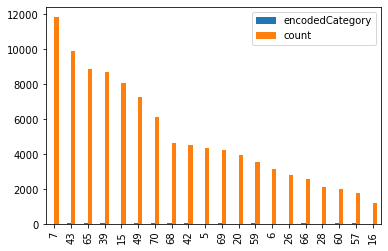

In [62]:
df5Copy.groupby(['encodedCategory'])['encodedCategory'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20).plot(kind="bar")

In [63]:
df5Copy['TargetVar']=df5Copy.order_status.apply(lambda x: 1 if x in ['delivered','invoiced'] else 0)
 

<ipython-input-63-ffbbccb133eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5Copy['TargetVar']=df5Copy.order_status.apply(lambda x: 1 if x in ['delivered','invoiced'] else 0)


In [64]:
df5Copy=df5Copy.drop(['order_status'], axis=1)

In [74]:
df5Copy.head()

,price,freight_value,review_score,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_estimated_delivery_date,payment_installments,payment_value,encodedCategory,category_count,TargetVar,Days_to_deliver,Month
0,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-09-29,2,72.19,20,3999,1,15.625671,9
1,55.9,17.96,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-07-26,1,73.86,20,3999,1,27.505324,7
2,64.9,18.33,4,4.0,650.0,28.0,9.0,14.0,cool_stuff,2018-06-07,2,83.23,20,3999,1,19.565359,6
3,58.9,16.17,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-08-25,3,75.07,20,3999,1,23.223125,8
4,58.9,13.29,5,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-09-01,4,72.19,20,3999,1,21.091204,9


In [73]:
df5Copy['Month']=df5Copy['order_estimated_delivery_date'].dt.month

In [77]:
df5Copy.to_csv('allProduct.csv')

In [67]:
from pandas_profiling import ProfileReport

In [75]:
profile=ProfileReport(df5Copy,title='Dataset Profiling Report',explorative=True)

In [76]:
profile.to_widgets()

In [228]:
profile.to_file('output.html')